<a href="https://colab.research.google.com/github/themightyNJ/learningDeepLearning/blob/master/SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Sigmoid Function

In [29]:
import numpy as np
import matplotlib.pyplot as plt

Sigmoid Function:-

## $S_{w,b}(x) = \frac{1}{1 + e^{-(wx + b)}}$

In [30]:
def sigmoid(x, w, b):
    return 1/(1 + np.exp(-(w*x + b)))

In [31]:
sigmoid(1, 0.5, 0)

0.6224593312018546

In [32]:
w = 2    #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = -2    #@param {type: "slider", min: -2, max: 2, step: 0.1}
x = np.linspace(-10, 10, 100)
Y = sigmoid(x, w, b)

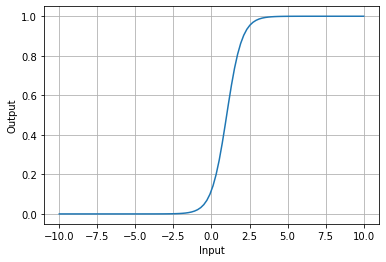

In [33]:
plt.plot(x,Y)
plt.xlabel("Input")
plt.ylabel('Output')
plt.grid()
plt.show()

Sigmoid Function w/ 2 inputs:

## $S_{w_1,w_2,b}(x_1,x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}$

In [34]:
def sigmoid_2d(x1, x2, w1, w2, b):
    return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [35]:
sigmoid_2d(1, 0, 0.5, 0 ,0)

0.6224593312018546

## Creating a 3D plot for 2 i/p and 1 o/p.

In [36]:
from mpl_toolkits import mplot3d
%matplotlib inline

In [37]:
#defining the data
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100) 
#Making a grid to plot every combination of data
X1,X2 = np.meshgrid(x1,x2)

In [38]:
w1 = 0.5
w2 = 2
b = 0
Y = sigmoid_2d(X1,X2, w1, w2, b)

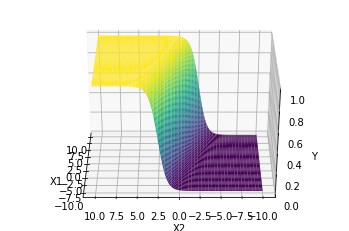

In [39]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Y, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
#To view from different height and angle respectively
ax.view_init(30,180)

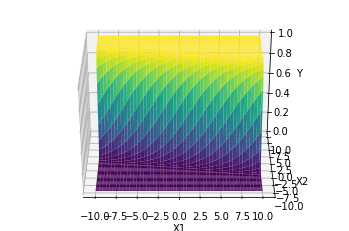

In [40]:
#To view from different angles
ax.view_init(30,270)
fig 

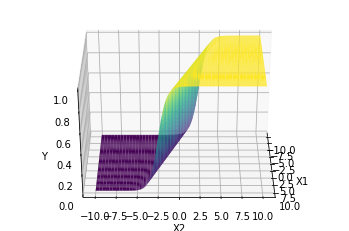

In [41]:
#To view from different angles
ax.view_init(30,0)
fig 

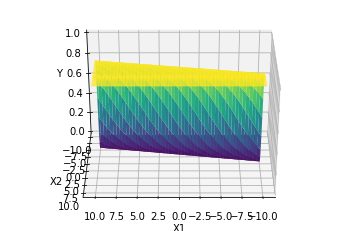

In [42]:
#To view from different angles
ax.view_init(30,90)
fig 

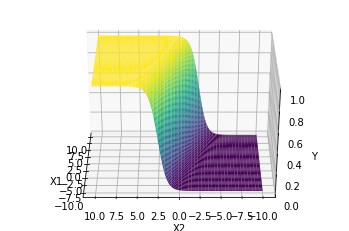

In [43]:
#To view from different angles
ax.view_init(30,180)
fig 

# Compute Loss for a Given Dataset

In [44]:
# Dataset
w_unknown = 0.5
b_unknown = 0.25
X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

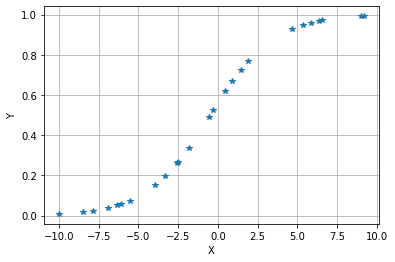

In [45]:
plt.plot(X,Y,"*")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

In [46]:
#Function to calculate Loss
def calculate_loss(X, Y, w_est, b_est):
    loss = 0
    for x,y in zip(X,Y):
        loss += (y - sigmoid(x, w_est, b_est))**2
    return loss

In [47]:
#Range of w's and b's for Brute Force method
w = np.linspace(-2, 2, 201)
b = np.linspace(-2, 2, 201)
#Meshgrid of Weights and Bias values
W,B = np.meshgrid(w,b)

Loss = np.zeros(W.shape)

## Plotting Loss

In [48]:
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Loss[i][j] = calculate_loss(X,Y, W[i][j], B[i][j])

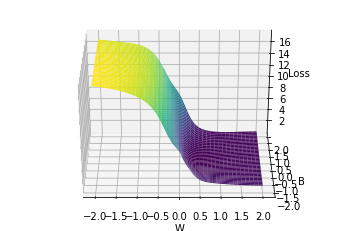

In [49]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(W, B, Loss, cmap='viridis')
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('Loss')
#To view from different height and angle respectively
ax.view_init(30,270)

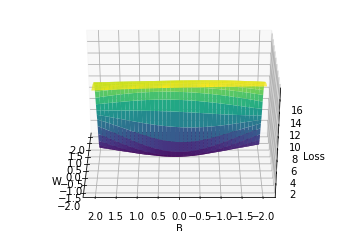

In [50]:
ax.view_init(30,180)
fig

In [51]:
#Co-ordinates of the min Loss
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])
print("Min loss is at index = ", i,",", j)
print("Min loss is at value, w = ", round(W[i][j],2),"b = ", round(B[i][j],2))

Min loss is at index =  112 , 125
Min loss is at value, w =  0.5 b =  0.24


# Class for Sigmoid Neuron

In [55]:
class SigmoidNeuron:

    def __init__(self):
        self.w = None
        self.b = None
    
    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b

    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def grad_w(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x

    def grad_b(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)

    def fit(self, X, Y, epochs = 1, learning_rate = 1, initialize = True):
        #initialize w,b
        if initialize:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0

        for i in range(epochs):
            dw = 0
            db = 0
            for x,y in zip(X,Y):
                dw += self.grad_w(x, y)
                db += self.grad_b(x, y)
            self.w -= learning_rate * dw
            self.b -= learning_rate * db

# Fitting toy data

In [56]:
X = np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
Y = [1,1,1,0,0,0]

In [57]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.75, True)
print(sn.w, sn.b)

[[ 0.24616708 -0.34935837]] [0.03764155]


In [58]:
def plot_sn(X, Y, sn, ax):
    X1 = np.linspace(-10, 10, 100)
    X2 = np.linspace(-10, 10, 100)
    XX1, XX2 = np.meshgrid(X1,X2)
    YY = np.zeros(XX1.shape)
    
    for i in range(X2.size):
        for j in range(X1.size):
            val = np.asarray([X1[j],X2[i]])
            YY[i][j] = sn.sigmoid(sn.perceptron(val))
    
    ax.contourf(XX1, XX2, YY, cmap = 'viridis', alpha = 0.6)
    ax.scatter(X[:, 0], X[:, 1], c = Y, cmap = 'viridis')
    plt.show()

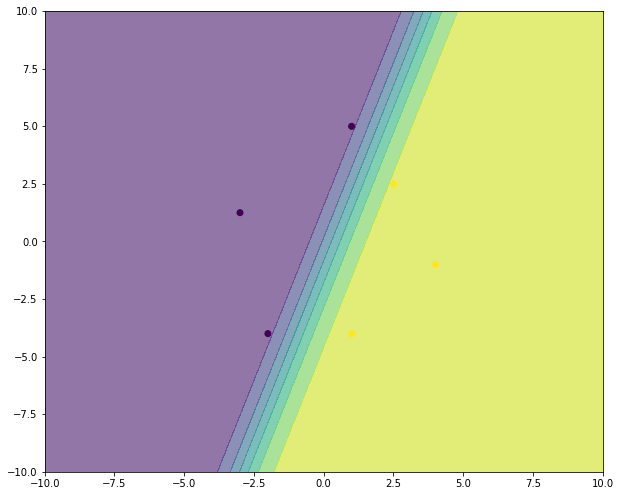

[[ 1.94864512 -0.64166017]] [-0.74110801]


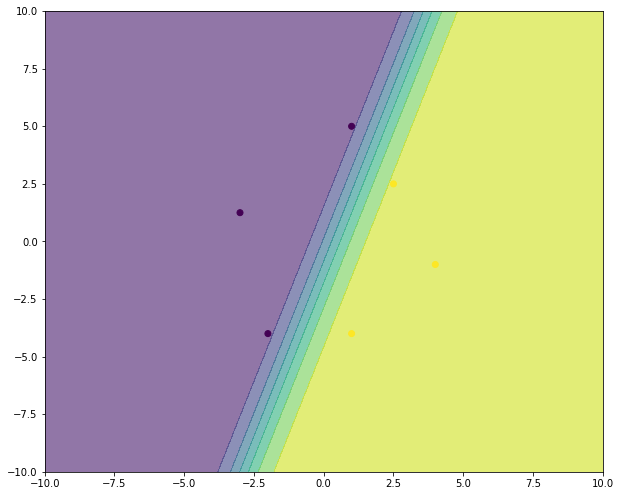

[[ 1.96582925 -0.64715075]] [-0.75464412]


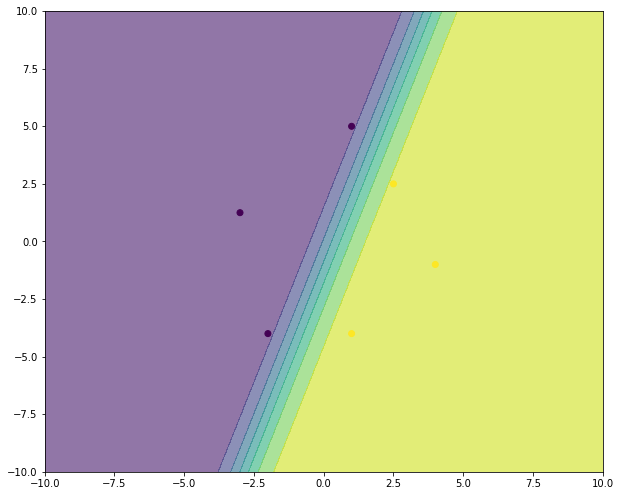

[[ 1.98238736 -0.65244284]] [-0.7675895]


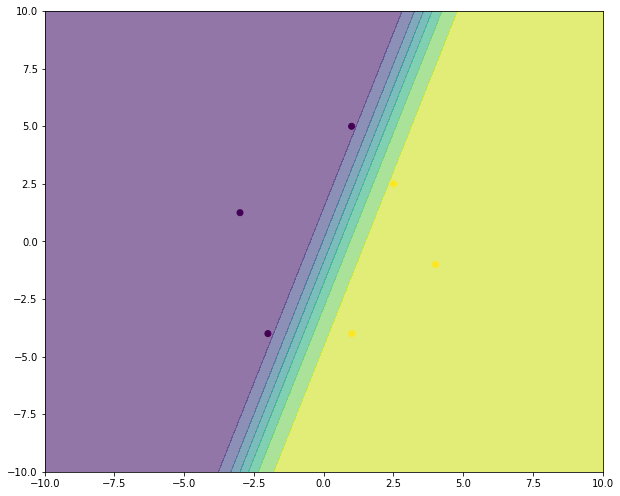

[[ 1.9983631  -0.65755026]] [-0.77999002]


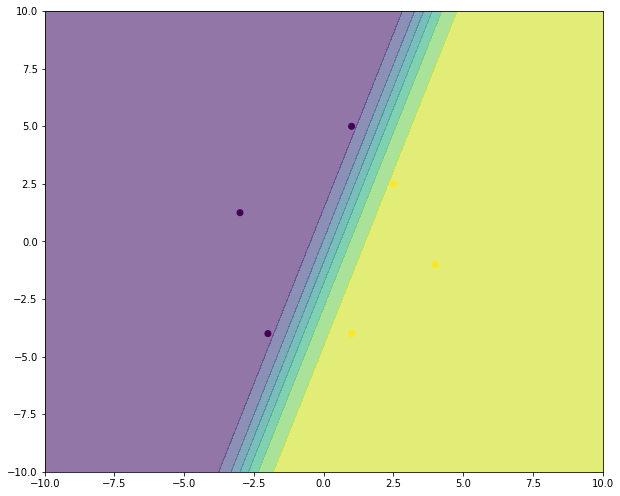

[[ 2.01379569 -0.66248547]] [-0.79188657]


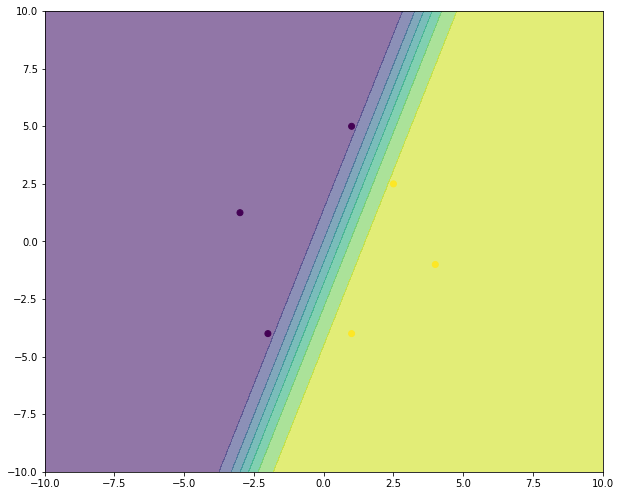

[[ 2.02872057 -0.66725969]] [-0.80331578]


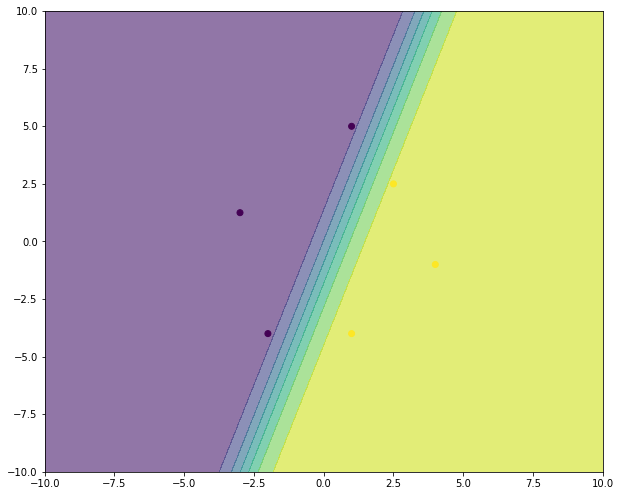

[[ 2.04316982 -0.67188309]] [-0.81431056]


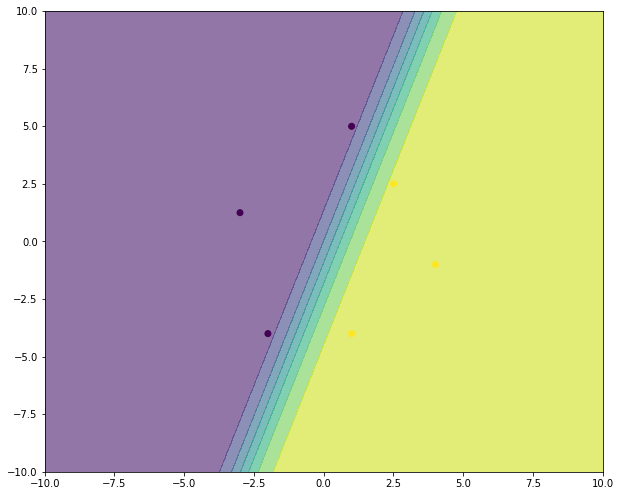

[[ 2.05717258 -0.6763649 ]] [-0.82490059]


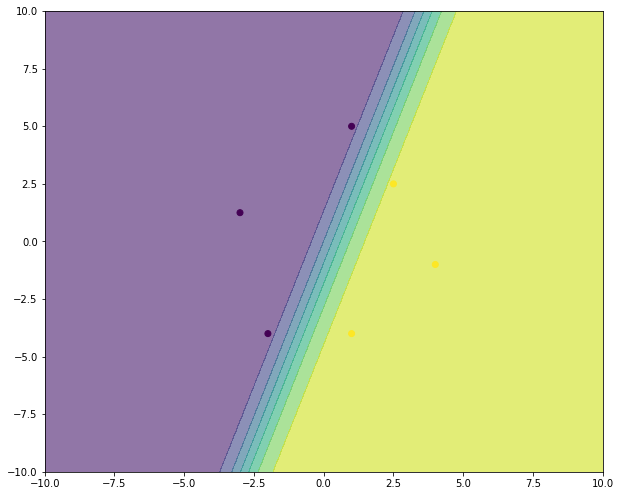

[[ 2.07075542 -0.68071354]] [-0.83511269]


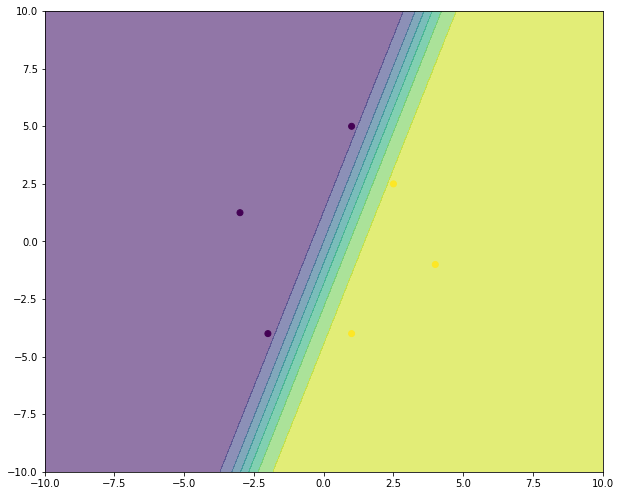

[[ 2.08394259 -0.68493669]] [-0.8449712]


In [61]:
n = 10
for i in range(n):
    sn.fit(X, Y, 1, 0.75, False)
    plt.figure(figsize = (10, n*10))
    ax = plt.subplot(n, 1, i+1)
    plot_sn(X, Y, sn, ax)
    print(sn.w, sn.b)

# Load Data

In [76]:
import pandas as pd
path = "https://raw.githubusercontent.com/themightyNJ/learningDeepLearning/master/mobile_cleaned.csv"

In [77]:
data = pd.read_csv(path)
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4


In [78]:
data.shape

(341, 88)

In [82]:
X = data.drop("Rating", axis = 1)
Y = data["Rating"].values

In [91]:
threshold = 4.2
data["Class"] = (data["Rating"] >= threshold).astype(np.int)

In [92]:
data["Class"].value_counts(normalize = True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [93]:
Y_binarized = data["Class"].values

## Standardisation

In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
scaler = StandardScaler()

In [ ]:
'''scaler.fit(X)
XT = scaler.transform(X)'''